In [1]:
%load_ext autoreload
%autoreload 2

import xarray as xr

from mjonet.data import era5
from mjonet.viz import plot_era5

save_dir = '/global/cscratch1/sd/jpduncan/mjo/data/debug'

### Preprocess some of the variables.

In [2]:
%%time

dset = era5.preprocess('mtnlwrf', 'r', 'z', plevels={'r': [200, 500], 'z': [200]}, year_or_range=1988, 
                       save_dir=save_dir, parallel=False, verbose=True)

dset

Processing 756 files.
Datasets opened and combined. Subsampling and regridding.
CPU times: user 53.4 s, sys: 502 ms, total: 53.9 s
Wall time: 2min 7s


<xarray.Dataset>
Dimensions:   (time: 1466, lat: 721, lon: 1440, r_level: 2, z_level: 1)
Coordinates:
  * time      (time) datetime64[ns] 1988-01-01 ... 1989-01-01T06:00:00
  * lat       (lat) float64 90.0 89.75 89.5 89.25 ... -89.25 -89.5 -89.75 -90.0
  * lon       (lon) float64 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.2 359.5 359.8
  * r_level   (r_level) float64 200.0 500.0
  * z_level   (z_level) float64 200.0
Data variables:
    MTNLWRF   (time, lat, lon) float32 dask.array<chunksize=(2, 721, 1440), meta=np.ndarray>
    R         (time, r_level, lat, lon) float32 dask.array<chunksize=(4, 2, 721, 1440), meta=np.ndarray>
    utc_date  (time) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    Z         (time, z_level, lat, lon) float32 dask.array<chunksize=(4, 1, 721, 1440), meta=np.ndarray>

### Compare processed data with original.

Get original data.

In [3]:
fnames = era5.get_filenames('mtnlwrf', 'r', 'z', year_or_range=1988)

mtnlwrf = xr.open_dataset(fnames['mtnlwrf'][0])
r = xr.open_dataset(fnames['r'][0])
z = xr.open_dataset(fnames['z'][0])

Compare original and preprocessed.

mtnlwrf times match
1988-01-01T12:00:00.000000000
1988-01-01T12:00:00.000000000 

r times match
1988-01-01T12:00:00.000000000
1988-01-01T12:00:00.000000000 

z times match
1988-01-01T12:00:00.000000000
1988-01-01T12:00:00.000000000 

plots match


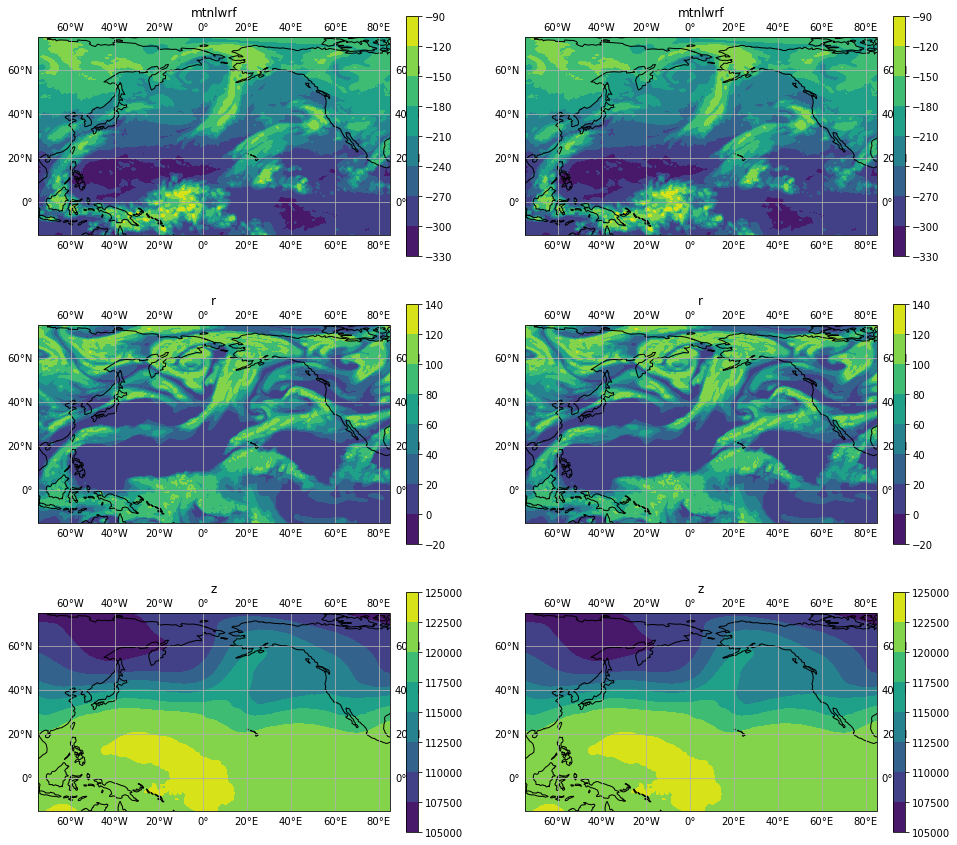

In [4]:
print('mtnlwrf times match')
print(dset['MTNLWRF']['time'][2].data)
print(mtnlwrf['forecast_initial_time'][0].data + mtnlwrf['forecast_hour'][5].data.astype('timedelta64[h]'), '\n')

print('r times match')
print(dset['R']['time'][2].data)
print(r['time'][12].data, '\n')

print('z times match')
print(dset['Z']['time'][2].data)
print(z['time'][12].data, '\n')

print('plots match')
plot_era5(dset['MTNLWRF'][2, :], mtnlwrf['MTNLWRF'][0, 5, :],
          dset['R'][2, :].sel({'r_level': 500}), r['R'][12, :].sel({'level': 500}),
          dset['Z'][2, :].sel({'z_level': 200}), z['Z'][12, :].sel({'level': 200}))